# COMP3314 Assignment 1

### Wang Yuli 3035028946


## Code: Sorting

Sorting Algorithm: selection sort, by selecting smallest numbers and swapping to front in each iteration

Complexity: O(n^2)

In [1]:
# the function:
def sort(values):
    for i in range(0, len(values)):
        min_index = i
        for j in range (i+1, len(values)):
            if(values[min_index] > values[j]):
                min_index = j
        # swapping:
        temp = values[min_index]
        values[min_index] = values[i]
        values[i] = temp
    return values

In [2]:
# main
import numpy as np

# different random seed
np.random.seed()

# generate numbers
N = 20
# the TA will vary the input array size and content during testing
values = np.random.random([N])

sort(values)

correct = True
for index in range(1, len(values)):
    if(values[index-1] > values[index]):
        correct = False
print('Correct? ' + str(correct))

Correct? True


## Math: line fitting

Given:
\begin{align}
\frac{\partial L}{\partial w_0} & = 0 \\
\frac{\partial L}{\partial w_1} & = 0
\end{align}

We have:
\begin{align}
\frac{\partial \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2}{\partial w_0} &= 0 \\
\frac{\partial \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2}{\partial w_1} &= 0
\end{align}

Therefore:
\begin{align}
\sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right) &= 0 \\
\sum_i \left(X^{(i)} \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)\right)&= 0
\end{align}

From the first above, we have:
\begin{align}
w_1 &= \frac{\sum_i \left( T^{(i)} - w_0 \right)}{\sum_i X^{(i)}} \\
\end{align}

Solve the group of equations, we have:

Assume: X and T each have N rows, Thus:
\begin{align}
w_0 &= \frac{\sum_i X^{(i)} \sum_i X^{(i)}T^{(i)} - \sum_i T^{(i)}\sum_i \left(X^{(i)}\right)^2} {\left(\sum_i(X^{(i)}\right)^2 - N \sum_i \left(X^{(i)}\right)^2} \\
w_1 &= \frac{\sum_i T^{(i)}}{\sum_i X^{(i)}} - \frac{N\sum_i X^{(i)} \sum_i X^{(i)}T^{(i)} - N\sum_i T^{(i)}\sum_i \left(X^{(i)}\right)^2} {\left(\sum_i(X^{(i)}\right)^3 - N \sum_i \left(X^{(i)}\right)^2\sum_i X^{(i)}}
\end{align}

## Code: Regression Model

In function Line.learn(): parameter w0 and w1 are computed according to the equation for w0 and relationship between w0 & w1 as stated above.

Since the noise is non-zero, certain error will be generated in the predict line plotted. However, if the noise is zero, the two lines should be exactly the same

In [3]:
# line model
import numpy as np

class Line(object):
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
        
    def predict(self, x, noise=0):
        return (x*self.w1 + self.w0 + noise*np.random.normal())

    # Input: data, a 2D array with each (x, t) pair on a row
    # Return: w0 and w1, the intercept and slope of the fitted line
    def learn(self, data):
        # replace the default code below which simply does random computation 
        X = data[:,0]
        T = data[:,1]
        N = data.shape[0]
        w0 = (np.sum(X)*np.sum(np.multiply(X,T)) - np.sum(T)*np.sum(np.square(X))) / (np.sum(X) ** 2 - N*np.sum(np.square(X)))
        w0_array = np.full((1,20),w0)
        w1 = np.sum(np.subtract(T,w0_array)) / np.sum(X)
        
        return w0, w1

In [4]:
# test
np.random.seed()

w0 = np.asscalar(np.random.random(1))*2-1
w1 = np.asscalar(np.random.random(1))*2-1

line = Line(w0, w1)

N = 20
noise = 0.05
X = np.random.random([N])
T = []
for x in X:
    T.append(np.sum(line.predict(x, noise)))
T = np.array(T)  

#data = np.vstack((X, T)).transpose()
data = np.array([X, T]).transpose()

w0_fit, w1_fit = line.learn(data)

line_fit = Line(w0_fit, w1_fit)

print('truth:   ' + str(w0) + ' ' + str(w1))
print('predict: ' + str(w0_fit) + ' ' + str(w1_fit))

truth:   0.09075222324067345 -0.5299907619712287
predict: 0.0601894062101 -0.501645650579


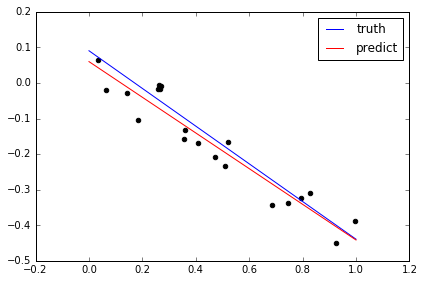

In [5]:
# plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data[:, 0], data[:, 1], color='black', marker='o')

X_endpoints = [0, 1]
Y_truth, Y_fit = [], []
for x in X_endpoints:
    Y_truth.append(line.predict(x))
    Y_fit.append(line_fit.predict(x))
    
plt.plot(X_endpoints, Y_truth, color='blue', label='truth')
plt.plot(X_endpoints, Y_fit, color='red', label='predict')

plt.legend(loc='best')
plt.tight_layout()
plt.show()